In [1]:
pip install tensorflow

     |████████████████████████████████| 320.4 MB 21 kB/s s eta 0:00:01�██████████ | 309.4 MB 42.3 MB/s eta 0:00:01��███████████▋| 316.8 MB 42.3 MB/s eta 0:00:01
     |████████████████████████████████| 459 kB 63.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 46.8 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 91 kB/s s eta 0:00:01
     |████████████████████████████████| 65 kB 468 kB/s  eta 0:00:01
     |████████████████████████████████| 2.9 MB 54.4 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 29.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 48.6 MB/s eta 0:00:01
     |████████████████████████████████| 10.6 MB 56.1 MB/s eta 0:00:01:00:01
     |████████████████████████████████| 57 kB 6.1 MB/s  eta 0:00:01
     |████████████████████████████████| 20.1 MB 54.1 MB/s eta 0:00:01
     |████████████████████████████████| 114 kB 33.7 MB/s eta 0:00:01
     |████████████████████████████████| 298 kB 52.9 MB/s eta 0:00:01
     |

In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [160]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_d5d3a80a292040fb979146265ce9da69.csv" 
df=pd.read_csv(url)
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [161]:
df.shape

(1030, 9)

In [162]:
df.columns

Index(['Cement ', 'Blast Furnace Slag ', 'Fly Ash ', 'Water',
       'Superplasticizer ', 'Coarse Aggregate ', 'Fine Aggregate ',
       'Age (day)', 'Concrete compressive strength'],
      dtype='object')

In [163]:
cement=df["Cement "]
superplasticizer=df["Superplasticizer "]

binder=cement+superplasticizer

In [164]:
water=df['Water']
ratio=water/binder

In [165]:
ratio=pd.DataFrame(ratio,columns=['ratio'])
ratio.head()

,ratio
0,0.298618
1,0.298618
2,0.685714
3,0.685714
4,0.966767


In [166]:
age=df[['Age (day)']]
X=pd.concat([ratio,age],axis=1)
X.head()

,ratio,Age (day)
0,0.298618,28
1,0.298618,28
2,0.685714,270
3,0.685714,365
4,0.966767,360


In [167]:
y=df[['Concrete compressive strength']]
y.head()

,Concrete compressive strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


In [168]:
#from sklearn.covariance import EllipticEnvelope
#clf = EllipticEnvelope(random_state=0).fit(X)
#outlier_label=pd.DataFrame(clf.predict(X))
#outlier_label=outlier_label.rename(columns={0:"outlier_label"})
#outlier_label

In [169]:
#df_labeled=pd.concat([X,y,outlier_label],axis=1)
#df_labeled

In [170]:
#df_cleaned=df_labeled[df_labeled["outlier_label"]==1]
#df_cleaned=df_cleaned.drop(["outlier_label"],axis=1)
#df_cleaned

In [171]:
#X=df_cleaned.drop(['Concrete compressive strength'],axis=1)
#X

In [159]:
#y=df_cleaned[['Concrete compressive strength']]
#y

In [172]:
#import keras
#from keras import metrics
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.optimizers import Adam
#from keras.layers import Dropout

In [173]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)

(772, 2)
(258, 2)


In [174]:
from sklearn.model_selection import GridSearchCV

parameters = {'loss':('ls','lad','huber'), 'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.2],
             'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,2,3,4],'max_features':("sqrt","log2","auto"),
             "max_depth":[3,4,5]}

In [175]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
Gradient=GradientBoostingRegressor(n_estimators=500,random_state=0)
Gradient_grid = GridSearchCV(estimator =Gradient, param_grid = parameters,cv = 3,scoring="r2", verbose=2, n_jobs = -1)

In [163]:
Gradient_grid.fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))

Fitting 3 folds for each of 2592 candidates, totalling 7776 fits
[CV] learning_rate=0.001, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.001, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.001, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  learning_rate=0.001, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, max_features=sqrt, min_samp

[CV]  learning_rate=0.001, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, max_features=sqrt, min_samp

[CV]  learning_rate=0.001, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, max_features=log2, min_samp

[CV]  learning_rate=0.001, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   0.4s
[CV] learning_rate=0.001, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   0.4s
[CV] learning_rate=0.001, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=3, max_features=auto, min_samp

[CV]  learning_rate=0.001, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.001, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   0.4s
[CV] learning_rate=0.001, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=4, max_features=sqrt, min_samp

[CV]  learning_rate=0.001, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.001, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.001, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=4, max_features=sqrt, min_samp

[CV]  learning_rate=0.001, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.001, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=4, max_features=log2, min_samp

[CV]  learning_rate=0.001, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.001, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=4, max_features=auto, min_samp

[CV]  learning_rate=0.001, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, max_features=sqrt, min_samp

[CV]  learning_rate=0.001, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, max_features=sqrt, min_samp

[CV]  learning_rate=0.001, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.001, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, max_features=log2, min_samp

[CV]  learning_rate=0.001, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   0.4s
[CV] learning_rate=0.001, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   0.4s
[CV] learning_rate=0.001, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   0.4s
[CV] learning_rate=0.001, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   0.4s
[CV] learning_rate=0.001, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.001, loss=ls, max_depth=5, max_features=auto, min_samp

[CV]  learning_rate=0.001, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.001, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.9s
[CV] learning_rate=0.001, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   0.8s
[CV] learning_rate=0.001, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   0.8s
[CV] learning_rate=0.001, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, max_features=sqrt,

[CV]  learning_rate=0.001, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.001, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.001, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   1.0s
[CV] learning_rate=0.001, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   1.1s
[CV] learning_rate=0.001, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, max_features=sqrt,

[CV]  learning_rate=0.001, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   1.3s
[CV] learning_rate=0.001, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.001, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   1.0s
[CV] learning_rate=0.001, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   1.1s
[CV] learning_rate=0.001, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, max_features=log2,

[CV]  learning_rate=0.001, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.001, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.001, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   1.0s
[CV] learning_rate=0.001, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   0.9s
[CV] learning_rate=0.001, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=3, max_features=auto,

[CV]  learning_rate=0.001, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.3s
[CV] learning_rate=0.001, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.001, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.4s
[CV] learning_rate=0.001, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   1.3s
[CV] learning_rate=0.001, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   1.3s
[CV] learning_rate=0.001, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=4, max_features=sqrt,

[CV]  learning_rate=0.001, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.5s
[CV] learning_rate=0.001, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.001, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.4s
[CV] learning_rate=0.001, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   1.5s
[CV] learning_rate=0.001, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   1.3s
[CV] learning_rate=0.001, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=4, max_features=sqrt,

[CV]  learning_rate=0.001, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   2.0s
[CV] learning_rate=0.001, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.001, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   1.9s
[CV] learning_rate=0.001, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   1.8s
[CV] learning_rate=0.001, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   2.0s
[CV] learning_rate=0.001, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=4, max_features=log2,

[CV]  learning_rate=0.001, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.5s
[CV] learning_rate=0.001, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.001, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.6s
[CV] learning_rate=0.001, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   1.5s
[CV] learning_rate=0.001, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   1.5s
[CV] learning_rate=0.001, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=4, max_features=auto,

[CV]  learning_rate=0.001, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   2.0s
[CV] learning_rate=0.001, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.9s
[CV] learning_rate=0.001, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   1.8s
[CV] learning_rate=0.001, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   2.1s
[CV] learning_rate=0.001, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, max_features=sqrt,

[CV]  learning_rate=0.001, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   2.1s
[CV] learning_rate=0.001, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   2.0s
[CV] learning_rate=0.001, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   1.9s
[CV] learning_rate=0.001, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   1.8s
[CV] learning_rate=0.001, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, max_features=sqrt,

[CV]  learning_rate=0.001, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   2.1s
[CV] learning_rate=0.001, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   2.1s
[CV] learning_rate=0.001, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   1.9s
[CV] learning_rate=0.001, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   2.1s
[CV] learning_rate=0.001, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, max_features=log2,

[CV]  learning_rate=0.001, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   2.4s
[CV] learning_rate=0.001, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   2.2s
[CV] learning_rate=0.001, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   2.2s
[CV] learning_rate=0.001, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   2.1s
[CV] learning_rate=0.001, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.001, loss=lad, max_depth=5, max_features=auto,

[CV]  learning_rate=0.001, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.001, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.001, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.001, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   1.2s
[CV] learning_rate=0.001, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   1.2s
[CV] learning_rate=0.001, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=huber, max_depth=3, 

[CV]  learning_rate=0.001, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.001, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.001, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.001, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.001, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.001, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.001, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   1.0s
[CV] learning_rate=0.001, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.001, loss=huber, max_depth=3, 

[CV]  learning_rate=0.001, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, total=   1.1s
[CV] learning_rate=0.001, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.001, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.001, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.001, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.001, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.001, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.001, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.001, loss=huber, max_depth=3, 

[CV]  learning_rate=0.001, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, total=   1.1s
[CV] learning_rate=0.001, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5 
[CV]  learning_rate=0.001, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, total=   1.1s
[CV] learning_rate=0.001, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.001, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.001, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.001, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.001, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.001, loss=huber, max_depth=3, 

[CV]  learning_rate=0.001, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, total=   1.1s
[CV] learning_rate=0.001, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5 
[CV]  learning_rate=0.001, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, total=   1.2s
[CV] learning_rate=0.001, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5 
[CV]  learning_rate=0.001, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, total=   1.2s
[CV] learning_rate=0.001, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.001, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.8s
[CV] learning_rate=0.001, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.001, loss=huber, max_depth=4, 

[CV]  learning_rate=0.001, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, total=   2.1s
[CV] learning_rate=0.001, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5 
[CV]  learning_rate=0.001, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   2.3s
[CV] learning_rate=0.001, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5 
[CV]  learning_rate=0.001, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   2.5s
[CV] learning_rate=0.001, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5 
[CV]  learning_rate=0.001, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   2.1s
[CV] learning_rate=0.001, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.001, loss=huber, max_depth=4, 

[CV]  learning_rate=0.001, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, total=   2.3s
[CV] learning_rate=0.001, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4 
[CV]  learning_rate=0.001, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, total=   2.4s
[CV] learning_rate=0.001, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5 
[CV]  learning_rate=0.001, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, total=   1.9s
[CV] learning_rate=0.001, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5 
[CV]  learning_rate=0.001, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, total=   2.3s
[CV] learning_rate=0.001, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5 
[CV]  learning_rate=0.001, loss=huber, max_depth=4, 

[CV]  learning_rate=0.001, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=4, total=   1.9s
[CV] learning_rate=0.001, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=4 
[CV]  learning_rate=0.001, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=4, total=   1.8s
[CV] learning_rate=0.001, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=4 
[CV]  learning_rate=0.001, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=4, total=   1.7s
[CV] learning_rate=0.001, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5 
[CV]  learning_rate=0.001, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, total=   1.6s
[CV] learning_rate=0.001, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5 
[CV]  learning_rate=0.001, loss=huber, max_depth=4, 

[CV]  learning_rate=0.001, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, total=   1.9s
[CV] learning_rate=0.001, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4 
[CV]  learning_rate=0.001, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4, total=   1.8s
[CV] learning_rate=0.001, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4 
[CV]  learning_rate=0.001, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4, total=   1.7s
[CV] learning_rate=0.001, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4 
[CV]  learning_rate=0.001, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4, total=   1.6s
[CV] learning_rate=0.001, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5 
[CV]  learning_rate=0.001, loss=huber, max_depth=4, 

[CV]  learning_rate=0.001, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, total=   2.8s
[CV] learning_rate=0.001, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.001, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, total=   2.9s
[CV] learning_rate=0.001, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4 
[CV]  learning_rate=0.001, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, total=   2.7s
[CV] learning_rate=0.001, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4 
[CV]  learning_rate=0.001, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, total=   3.6s
[CV] learning_rate=0.001, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4 
[CV]  learning_rate=0.001, loss=huber, max_depth=5, 

[CV]  learning_rate=0.001, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, total=   3.0s
[CV] learning_rate=0.001, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.001, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, total=   3.1s
[CV] learning_rate=0.001, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.001, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, total=   2.8s
[CV] learning_rate=0.001, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4 
[CV]  learning_rate=0.001, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, total=   2.9s
[CV] learning_rate=0.001, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4 
[CV]  learning_rate=0.001, loss=huber, max_depth=5, 

[CV]  learning_rate=0.001, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, total=   3.0s
[CV] learning_rate=0.001, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=3, total=   3.1s
[CV] learning_rate=0.001, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=3, total=   3.3s
[CV] learning_rate=0.001, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.001, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=3, total=   3.3s
[CV] learning_rate=0.001, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4 
[CV]  learning_rate=0.001, loss=huber, max_depth=5, 

[CV]  learning_rate=0.001, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, total=   3.2s
[CV] learning_rate=0.001, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.001, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, total=   3.4s
[CV] learning_rate=0.001, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.001, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, total=   3.0s
[CV] learning_rate=0.001, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.001, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, total=   3.0s
[CV] learning_rate=0.001, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.001, loss=huber, max_depth=5, 

[CV]  learning_rate=0.005, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.005, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.005, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=3, max_features=sqrt, min_samp

[CV]  learning_rate=0.005, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.005, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=3, max_features=log2, min_samp

[CV]  learning_rate=0.005, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.005, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=3, max_features=auto, min_samp

[CV]  learning_rate=0.005, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.005, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.005, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.005, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=3, max_features=auto, min_samp

[CV]  learning_rate=0.005, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.005, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.005, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.005, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.005, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=4, max_features=sqrt, min_samp

[CV]  learning_rate=0.005, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.005, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.005, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=4, max_features=log2, min_samp

[CV]  learning_rate=0.005, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.005, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=4, max_features=auto, min_samp

[CV]  learning_rate=0.005, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.005, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, total=   0.4s
[CV] learning_rate=0.005, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=4, max_features=auto, min_samp

[CV]  learning_rate=0.005, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.005, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=5, max_features=sqrt, min_samp

[CV]  learning_rate=0.005, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.005, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=5, max_features=log2, min_samp

[CV]  learning_rate=0.005, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.005, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=3, total=   0.4s
[CV] learning_rate=0.005, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=3, total=   0.4s
[CV] learning_rate=0.005, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=5, max_features=auto, min_samp

[CV]  learning_rate=0.005, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, total=   0.4s
[CV] learning_rate=0.005, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.005, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.005, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.005, loss=ls, max_depth=5, max_features=auto, min_samp

[CV]  learning_rate=0.005, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, total=   0.9s
[CV] learning_rate=0.005, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.005, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, total=   0.9s
[CV] learning_rate=0.005, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, total=   0.9s
[CV] learning_rate=0.005, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, total=   0.9s
[CV] learning_rate=0.005, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=3, max_features=sqrt,

[CV]  learning_rate=0.005, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, total=   0.9s
[CV] learning_rate=0.005, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.005, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.005, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, total=   1.0s
[CV] learning_rate=0.005, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, total=   1.0s
[CV] learning_rate=0.005, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=3, max_features=log2,

[CV]  learning_rate=0.005, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, total=   0.9s
[CV] learning_rate=0.005, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.005, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, total=   0.9s
[CV] learning_rate=0.005, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, total=   0.9s
[CV] learning_rate=0.005, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, total=   0.9s
[CV] learning_rate=0.005, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=3, max_features=auto,

[CV]  learning_rate=0.005, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.005, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.005, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, total=   0.9s
[CV] learning_rate=0.005, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, total=   0.8s
[CV] learning_rate=0.005, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, total=   0.9s
[CV] learning_rate=0.005, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=3, max_features=auto,

[CV]  learning_rate=0.005, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.005, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.005, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.005, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, total=   1.2s
[CV] learning_rate=0.005, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, total=   1.3s
[CV] learning_rate=0.005, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=4, max_features=sqrt,

[CV]  learning_rate=0.005, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.005, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.005, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, total=   1.3s
[CV] learning_rate=0.005, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, total=   1.4s
[CV] learning_rate=0.005, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, total=   1.3s
[CV] learning_rate=0.005, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=4, max_features=log2,

[CV]  learning_rate=0.005, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.005, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.005, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.005, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=3, total=   1.3s
[CV] learning_rate=0.005, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=3, total=   1.3s
[CV] learning_rate=0.005, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=4, max_features=auto,

[CV]  learning_rate=0.005, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, total=   1.7s
[CV] learning_rate=0.005, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.005, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=2, total=   1.5s
[CV] learning_rate=0.005, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, total=   1.3s
[CV] learning_rate=0.005, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, total=   1.3s
[CV] learning_rate=0.005, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=4, max_features=auto,

[CV]  learning_rate=0.005, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, total=   1.7s
[CV] learning_rate=0.005, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.005, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, total=   1.8s
[CV] learning_rate=0.005, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, total=   1.7s
[CV] learning_rate=0.005, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, total=   1.8s
[CV] learning_rate=0.005, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=5, max_features=sqrt,

[CV]  learning_rate=0.005, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, total=   1.8s
[CV] learning_rate=0.005, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.005, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, total=   1.8s
[CV] learning_rate=0.005, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, total=   1.8s
[CV] learning_rate=0.005, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, total=   1.7s
[CV] learning_rate=0.005, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=5, max_features=log2,

[CV]  learning_rate=0.005, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, total=   1.8s
[CV] learning_rate=0.005, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.005, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, total=   1.8s
[CV] learning_rate=0.005, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=3, total=   1.8s
[CV] learning_rate=0.005, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=3, total=   1.7s
[CV] learning_rate=0.005, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=5, max_features=auto,

[CV]  learning_rate=0.005, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, total=   1.7s
[CV] learning_rate=0.005, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.005, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, total=   1.7s
[CV] learning_rate=0.005, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, total=   1.8s
[CV] learning_rate=0.005, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, total=   1.8s
[CV] learning_rate=0.005, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.005, loss=lad, max_depth=5, max_features=auto,

[CV]  learning_rate=0.005, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.005, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.005, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.005, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.005, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.005, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.005, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, total=   1.1s
[CV] learning_rate=0.005, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.005, loss=huber, max_depth=3, 

[CV]  learning_rate=0.005, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, total=   1.0s
[CV] learning_rate=0.005, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.005, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.005, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.005, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.005, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.005, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.005, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.005, loss=huber, max_depth=3, 

[CV]  learning_rate=0.005, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, total=   1.1s
[CV] learning_rate=0.005, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5 
[CV]  learning_rate=0.005, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, total=   1.0s
[CV] learning_rate=0.005, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.005, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.005, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.005, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.005, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.005, loss=huber, max_depth=3, 

[CV]  learning_rate=0.005, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, total=   1.1s
[CV] learning_rate=0.005, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5 
[CV]  learning_rate=0.005, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, total=   1.3s
[CV] learning_rate=0.005, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5 
[CV]  learning_rate=0.005, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, total=   1.2s
[CV] learning_rate=0.005, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.005, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, total=   1.3s
[CV] learning_rate=0.005, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.005, loss=huber, max_depth=3, 

[CV]  learning_rate=0.005, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, total=   1.6s
[CV] learning_rate=0.005, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5 
[CV]  learning_rate=0.005, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, total=   1.6s
[CV] learning_rate=0.005, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5 
[CV]  learning_rate=0.005, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, total=   1.5s
[CV] learning_rate=0.005, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5 
[CV]  learning_rate=0.005, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, total=   1.6s
[CV] learning_rate=0.005, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.005, loss=huber, max_depth=4, 

[CV]  learning_rate=0.005, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, total=   1.9s
[CV] learning_rate=0.005, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4 
[CV]  learning_rate=0.005, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=4, total=   1.8s
[CV] learning_rate=0.005, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5 
[CV]  learning_rate=0.005, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, total=   1.7s
[CV] learning_rate=0.005, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5 
[CV]  learning_rate=0.005, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, total=   1.6s
[CV] learning_rate=0.005, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5 
[CV]  learning_rate=0.005, loss=huber, max_depth=4, 

[CV]  learning_rate=0.005, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, total=   1.5s
[CV] learning_rate=0.005, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4 
[CV]  learning_rate=0.005, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, total=   1.6s
[CV] learning_rate=0.005, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4 
[CV]  learning_rate=0.005, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, total=   1.5s
[CV] learning_rate=0.005, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5 
[CV]  learning_rate=0.005, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5, total=   1.6s
[CV] learning_rate=0.005, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=5 
[CV]  learning_rate=0.005, loss=huber, max_depth=4, 

[CV]  learning_rate=0.005, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3, total=   2.0s
[CV] learning_rate=0.005, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4 
[CV]  learning_rate=0.005, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4, total=   1.9s
[CV] learning_rate=0.005, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4 
[CV]  learning_rate=0.005, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4, total=   1.7s
[CV] learning_rate=0.005, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4 
[CV]  learning_rate=0.005, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=4, total=   1.8s
[CV] learning_rate=0.005, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5 
[CV]  learning_rate=0.005, loss=huber, max_depth=4, 

[CV]  learning_rate=0.005, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, total=   2.7s
[CV] learning_rate=0.005, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.005, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, total=   2.4s
[CV] learning_rate=0.005, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4 
[CV]  learning_rate=0.005, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, total=   2.3s
[CV] learning_rate=0.005, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4 
[CV]  learning_rate=0.005, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, total=   2.5s
[CV] learning_rate=0.005, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4 
[CV]  learning_rate=0.005, loss=huber, max_depth=5, 

[CV]  learning_rate=0.005, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, total=   2.5s
[CV] learning_rate=0.005, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.005, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, total=   2.5s
[CV] learning_rate=0.005, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.005, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, total=   2.6s
[CV] learning_rate=0.005, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4 
[CV]  learning_rate=0.005, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, total=   2.4s
[CV] learning_rate=0.005, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4 
[CV]  learning_rate=0.005, loss=huber, max_depth=5, 

[CV]  learning_rate=0.005, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   2.2s
[CV] learning_rate=0.005, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.005, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3, total=   2.1s
[CV] learning_rate=0.005, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.005, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3, total=   2.4s
[CV] learning_rate=0.005, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.005, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3, total=   2.5s
[CV] learning_rate=0.005, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4 
[CV]  learning_rate=0.005, loss=huber, max_depth=5, 

[CV]  learning_rate=0.005, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   3.7s
[CV] learning_rate=0.005, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.005, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   4.0s
[CV] learning_rate=0.005, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.005, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, total=   3.6s
[CV] learning_rate=0.005, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.005, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, total=   3.8s
[CV] learning_rate=0.005, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.005, loss=huber, max_depth=5, 

[CV]  learning_rate=0.01, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=

[CV]  learning_rate=0.01, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.01, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.01, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.01, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.01, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=

[CV]  learning_rate=0.01, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=

[CV]  learning_rate=0.01, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.01, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=

[CV]  learning_rate=0.01, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=

[CV]  learning_rate=0.01, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=

[CV]  learning_rate=0.01, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.01, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=

[CV]  learning_rate=0.01, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.4s
[CV] learning_rate=0.01, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.4s
[CV] learning_rate=0.01, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.01, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.01, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=

[CV]  learning_rate=0.01, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=

[CV]  learning_rate=0.01, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.01, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.01, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.01, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.01, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=

[CV]  learning_rate=0.01, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.01, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.01, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.01, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=

[CV]  learning_rate=0.01, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.4s
[CV] learning_rate=0.01, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.01, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.4s
[CV] learning_rate=0.01, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.01, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.01, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=

[CV]  learning_rate=0.01, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   0.7s
[CV] learning_rate=0.01, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.01, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.01, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, total=   0.8s
[CV] learning_rate=0.01, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, max_features=sqrt, min_samp

[CV]  learning_rate=0.01, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.01, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   0.9s
[CV] learning_rate=0.01, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.01, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, total=   0.8s
[CV] learning_rate=0.01, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, max_features=log2, min_samp

[CV]  learning_rate=0.01, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   0.9s
[CV] learning_rate=0.01, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.01, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.01, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, total=   1.0s
[CV] learning_rate=0.01, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, max_features=log2, min_samp

[CV]  learning_rate=0.01, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.7s
[CV] learning_rate=0.01, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.01, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.01, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, total=   0.8s
[CV] learning_rate=0.01, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=3, max_features=auto, min_samp

[CV]  learning_rate=0.01, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.01, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.01, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.01, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, total=   1.1s
[CV] learning_rate=0.01, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=4, max_features=sqrt, min_samp

[CV]  learning_rate=0.01, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.01, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.01, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.01, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, total=   1.1s
[CV] learning_rate=0.01, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=4, max_features=log2, min_samp

[CV]  learning_rate=0.01, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.01, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   1.3s
[CV] learning_rate=0.01, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.01, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, total=   1.3s
[CV] learning_rate=0.01, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=4, max_features=log2, min_samp

[CV]  learning_rate=0.01, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   1.5s
[CV] learning_rate=0.01, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.01, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   1.4s
[CV] learning_rate=0.01, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3, total=   1.4s
[CV] learning_rate=0.01, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=4, max_features=auto, min_samp

[CV]  learning_rate=0.01, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   2.2s
[CV] learning_rate=0.01, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   2.3s
[CV] learning_rate=0.01, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   2.2s
[CV] learning_rate=0.01, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, total=   2.3s
[CV] learning_rate=0.01, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, max_features=sqrt, min_samp

[CV]  learning_rate=0.01, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   1.7s
[CV] learning_rate=0.01, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   1.9s
[CV] learning_rate=0.01, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   1.7s
[CV] learning_rate=0.01, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, total=   2.0s
[CV] learning_rate=0.01, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, max_features=log2, min_samp

[CV]  learning_rate=0.01, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   1.9s
[CV] learning_rate=0.01, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   1.8s
[CV] learning_rate=0.01, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   2.3s
[CV] learning_rate=0.01, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3, total=   2.2s
[CV] learning_rate=0.01, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, max_features=log2, min_samp

[CV]  learning_rate=0.01, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   1.8s
[CV] learning_rate=0.01, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   1.8s
[CV] learning_rate=0.01, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   1.8s
[CV] learning_rate=0.01, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, total=   1.8s
[CV] learning_rate=0.01, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.01, loss=lad, max_depth=5, max_features=auto, min_samp

[CV]  learning_rate=0.01, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.01, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.01, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.01, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.01, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.01, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.01, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, total=   1.1s
[CV] learning_rate=0.01, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.01, loss=huber, max_depth=3, max_featu

[CV]  learning_rate=0.01, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, total=   1.2s
[CV] learning_rate=0.01, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.01, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.01, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.01, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.01, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.01, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   1.3s
[CV] learning_rate=0.01, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.01, loss=huber, max_depth=3, max_featu

[CV]  learning_rate=0.01, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, total=   1.2s
[CV] learning_rate=0.01, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5 
[CV]  learning_rate=0.01, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, total=   1.1s
[CV] learning_rate=0.01, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.01, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.01, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.01, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.01, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.01, loss=huber, max_depth=3, max_featu

[CV]  learning_rate=0.01, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, total=   1.2s
[CV] learning_rate=0.01, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5 
[CV]  learning_rate=0.01, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, total=   1.3s
[CV] learning_rate=0.01, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5 
[CV]  learning_rate=0.01, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, total=   1.4s
[CV] learning_rate=0.01, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.01, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.01, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.01, loss=huber, max_depth=3, max_featu

[CV]  learning_rate=0.01, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, total=   1.8s
[CV] learning_rate=0.01, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5 
[CV]  learning_rate=0.01, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, total=   1.8s
[CV] learning_rate=0.01, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5 
[CV]  learning_rate=0.01, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, total=   1.7s
[CV] learning_rate=0.01, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5 
[CV]  learning_rate=0.01, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, total=   1.8s
[CV] learning_rate=0.01, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.01, loss=huber, max_depth=4, max_featu

[CV]  learning_rate=0.01, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, total=   1.6s
[CV] learning_rate=0.01, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4 
[CV]  learning_rate=0.01, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, total=   1.7s
[CV] learning_rate=0.01, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5 
[CV]  learning_rate=0.01, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, total=   1.7s
[CV] learning_rate=0.01, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5 
[CV]  learning_rate=0.01, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, total=   1.6s
[CV] learning_rate=0.01, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5 
[CV]  learning_rate=0.01, loss=huber, max_depth=4, max_featu

[CV]  learning_rate=0.01, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4, total=   1.8s
[CV] learning_rate=0.01, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4 
[CV]  learning_rate=0.01, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4, total=   2.1s
[CV] learning_rate=0.01, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4 
[CV]  learning_rate=0.01, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4, total=   1.8s
[CV] learning_rate=0.01, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5 
[CV]  learning_rate=0.01, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, total=   1.8s
[CV] learning_rate=0.01, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5 
[CV]  learning_rate=0.01, loss=huber, max_depth=4, max_featu

[CV]  learning_rate=0.01, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   1.7s
[CV] learning_rate=0.01, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4 
[CV]  learning_rate=0.01, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, total=   1.8s
[CV] learning_rate=0.01, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4 
[CV]  learning_rate=0.01, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, total=   1.9s
[CV] learning_rate=0.01, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4 
[CV]  learning_rate=0.01, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, total=   1.7s
[CV] learning_rate=0.01, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5 
[CV]  learning_rate=0.01, loss=huber, max_depth=4, max_featu

[CV]  learning_rate=0.01, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   2.7s
[CV] learning_rate=0.01, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.01, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   2.8s
[CV] learning_rate=0.01, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4 
[CV]  learning_rate=0.01, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, total=   2.8s
[CV] learning_rate=0.01, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4 
[CV]  learning_rate=0.01, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, total=   2.8s
[CV] learning_rate=0.01, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4 
[CV]  learning_rate=0.01, loss=huber, max_depth=5, max_featu

[CV]  learning_rate=0.01, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   2.2s
[CV] learning_rate=0.01, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.01, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   2.3s
[CV] learning_rate=0.01, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.01, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   2.3s
[CV] learning_rate=0.01, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4 
[CV]  learning_rate=0.01, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, total=   2.5s
[CV] learning_rate=0.01, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4 
[CV]  learning_rate=0.01, loss=huber, max_depth=5, max_featu

[CV]  learning_rate=0.01, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   2.4s
[CV] learning_rate=0.01, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.01, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   2.4s
[CV] learning_rate=0.01, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.01, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   2.4s
[CV] learning_rate=0.01, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.01, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   2.2s
[CV] learning_rate=0.01, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4 
[CV]  learning_rate=0.01, loss=huber, max_depth=5, max_featu

[CV]  learning_rate=0.01, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   2.9s
[CV] learning_rate=0.01, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.01, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   2.9s
[CV] learning_rate=0.01, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.01, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   2.7s
[CV] learning_rate=0.01, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.01, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   2.7s
[CV] learning_rate=0.01, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.01, loss=huber, max_depth=5, max_featu

[CV]  learning_rate=0.05, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.05, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.05, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.05, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=

[CV]  learning_rate=0.05, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.05, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.05, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.05, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.05, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=

[CV]  learning_rate=0.05, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.05, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.05, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.05, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.05, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=

[CV]  learning_rate=0.05, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.05, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=

[CV]  learning_rate=0.05, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.05, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.05, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=

[CV]  learning_rate=0.05, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.05, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=

[CV]  learning_rate=0.05, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.05, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=

[CV]  learning_rate=0.05, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.05, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=

[CV]  learning_rate=0.05, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.05, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=

[CV]  learning_rate=0.05, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.05, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.05, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=

[CV]  learning_rate=0.05, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.05, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=

[CV]  learning_rate=0.05, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.05, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.05, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.05, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=

[CV]  learning_rate=0.05, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.05, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.05, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.05, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   0.7s
[CV] learning_rate=0.05, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   0.9s
[CV] learning_rate=0.05, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=3, max_features=sqrt, min_samp

[CV]  learning_rate=0.05, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   0.7s
[CV] learning_rate=0.05, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.05, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   0.7s
[CV] learning_rate=0.05, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   0.7s
[CV] learning_rate=0.05, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   0.7s
[CV] learning_rate=0.05, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=3, max_features=sqrt, min_samp

[CV]  learning_rate=0.05, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.05, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.05, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.05, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   0.8s
[CV] learning_rate=0.05, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   0.7s
[CV] learning_rate=0.05, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=3, max_features=log2, min_samp

[CV]  learning_rate=0.05, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   0.7s
[CV] learning_rate=0.05, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.05, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.05, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   0.9s
[CV] learning_rate=0.05, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   0.8s
[CV] learning_rate=0.05, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=3, max_features=auto, min_samp

[CV]  learning_rate=0.05, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.5s
[CV] learning_rate=0.05, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.05, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.3s
[CV] learning_rate=0.05, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   1.3s
[CV] learning_rate=0.05, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   1.5s
[CV] learning_rate=0.05, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=4, max_features=sqrt, min_samp

[CV]  learning_rate=0.05, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.05, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.05, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.05, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   1.0s
[CV] learning_rate=0.05, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   1.1s
[CV] learning_rate=0.05, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=4, max_features=sqrt, min_samp

[CV]  learning_rate=0.05, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.05, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.05, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.05, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   1.0s
[CV] learning_rate=0.05, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   1.1s
[CV] learning_rate=0.05, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=4, max_features=log2, min_samp

[CV]  learning_rate=0.05, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.05, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.05, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.05, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   1.1s
[CV] learning_rate=0.05, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   1.0s
[CV] learning_rate=0.05, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=4, max_features=auto, min_samp

[CV]  learning_rate=0.05, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.7s
[CV] learning_rate=0.05, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.05, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.4s
[CV] learning_rate=0.05, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   1.3s
[CV] learning_rate=0.05, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   1.7s
[CV] learning_rate=0.05, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=5, max_features=sqrt, min_samp

[CV]  learning_rate=0.05, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.4s
[CV] learning_rate=0.05, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.05, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.4s
[CV] learning_rate=0.05, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   1.4s
[CV] learning_rate=0.05, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   1.4s
[CV] learning_rate=0.05, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=5, max_features=sqrt, min_samp

[CV]  learning_rate=0.05, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   1.9s
[CV] learning_rate=0.05, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.05, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   1.7s
[CV] learning_rate=0.05, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   1.6s
[CV] learning_rate=0.05, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   1.5s
[CV] learning_rate=0.05, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=5, max_features=log2, min_samp

[CV]  learning_rate=0.05, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.6s
[CV] learning_rate=0.05, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.05, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.4s
[CV] learning_rate=0.05, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   1.6s
[CV] learning_rate=0.05, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   1.6s
[CV] learning_rate=0.05, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.05, loss=lad, max_depth=5, max_features=auto, min_samp

[CV]  learning_rate=0.05, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.05, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.05, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.05, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.05, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   1.0s
[CV] learning_rate=0.05, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.05, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   1.0s
[CV] learning_rate=0.05, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.05, loss=huber, max_depth=3, max_featu

[CV]  learning_rate=0.05, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.05, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.05, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.05, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.05, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.05, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.05, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   0.9s
[CV] learning_rate=0.05, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.05, loss=huber, max_depth=3, max_featu

[CV]  learning_rate=0.05, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=5, total=   1.2s
[CV] learning_rate=0.05, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.05, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.05, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.05, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   1.3s
[CV] learning_rate=0.05, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.05, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.05, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.05, loss=huber, max_depth=3, max_featu

[CV]  learning_rate=0.05, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, total=   1.0s
[CV] learning_rate=0.05, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5 
[CV]  learning_rate=0.05, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, total=   1.0s
[CV] learning_rate=0.05, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.05, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.05, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.05, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.05, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.05, loss=huber, max_depth=3, max_featu

[CV]  learning_rate=0.05, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, total=   1.3s
[CV] learning_rate=0.05, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5 
[CV]  learning_rate=0.05, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, total=   1.3s
[CV] learning_rate=0.05, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5 
[CV]  learning_rate=0.05, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, total=   1.1s
[CV] learning_rate=0.05, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.05, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.6s
[CV] learning_rate=0.05, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.05, loss=huber, max_depth=4, max_featu

[CV]  learning_rate=0.05, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, total=   1.3s
[CV] learning_rate=0.05, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5 
[CV]  learning_rate=0.05, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   1.4s
[CV] learning_rate=0.05, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5 
[CV]  learning_rate=0.05, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   1.6s
[CV] learning_rate=0.05, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5 
[CV]  learning_rate=0.05, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   1.7s
[CV] learning_rate=0.05, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.05, loss=huber, max_depth=4, max_featu

[CV]  learning_rate=0.05, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, total=   1.6s
[CV] learning_rate=0.05, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4 
[CV]  learning_rate=0.05, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, total=   1.5s
[CV] learning_rate=0.05, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5 
[CV]  learning_rate=0.05, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, total=   1.7s
[CV] learning_rate=0.05, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5 
[CV]  learning_rate=0.05, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, total=   1.5s
[CV] learning_rate=0.05, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5 
[CV]  learning_rate=0.05, loss=huber, max_depth=4, max_featu

[CV]  learning_rate=0.05, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=4, total=   1.3s
[CV] learning_rate=0.05, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=4 
[CV]  learning_rate=0.05, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=4, total=   1.4s
[CV] learning_rate=0.05, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=4 
[CV]  learning_rate=0.05, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=4, total=   1.3s
[CV] learning_rate=0.05, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5 
[CV]  learning_rate=0.05, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, total=   1.3s
[CV] learning_rate=0.05, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5 
[CV]  learning_rate=0.05, loss=huber, max_depth=4, max_featu

[CV]  learning_rate=0.05, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, total=   1.0s
[CV] learning_rate=0.05, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4 
[CV]  learning_rate=0.05, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4, total=   1.1s
[CV] learning_rate=0.05, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4 
[CV]  learning_rate=0.05, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4, total=   1.2s
[CV] learning_rate=0.05, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4 
[CV]  learning_rate=0.05, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4, total=   1.1s
[CV] learning_rate=0.05, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5 
[CV]  learning_rate=0.05, loss=huber, max_depth=4, max_featu

[CV]  learning_rate=0.05, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, total=   2.1s
[CV] learning_rate=0.05, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.05, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, total=   1.8s
[CV] learning_rate=0.05, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4 
[CV]  learning_rate=0.05, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, total=   1.8s
[CV] learning_rate=0.05, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4 
[CV]  learning_rate=0.05, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, total=   1.8s
[CV] learning_rate=0.05, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=4 
[CV]  learning_rate=0.05, loss=huber, max_depth=5, max_featu

[CV]  learning_rate=0.05, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, total=   2.1s
[CV] learning_rate=0.05, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.05, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, total=   2.1s
[CV] learning_rate=0.05, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.05, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, total=   1.9s
[CV] learning_rate=0.05, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4 
[CV]  learning_rate=0.05, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4, total=   1.8s
[CV] learning_rate=0.05, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=4 
[CV]  learning_rate=0.05, loss=huber, max_depth=5, max_featu

[CV]  learning_rate=0.05, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, total=   2.0s
[CV] learning_rate=0.05, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.05, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=3, total=   1.9s
[CV] learning_rate=0.05, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.05, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=3, total=   1.9s
[CV] learning_rate=0.05, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.05, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=3, total=   1.8s
[CV] learning_rate=0.05, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4 
[CV]  learning_rate=0.05, loss=huber, max_depth=5, max_featu

[CV]  learning_rate=0.05, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, total=   1.4s
[CV] learning_rate=0.05, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.05, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, total=   1.3s
[CV] learning_rate=0.05, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.05, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, total=   1.4s
[CV] learning_rate=0.05, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.05, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3, total=   1.5s
[CV] learning_rate=0.05, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.05, loss=huber, max_depth=5, max_featu

[CV]  learning_rate=0.1, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_sa

[CV]  learning_rate=0.1, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=4 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=2, min_sa

[CV]  learning_rate=0.1, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=4 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=4, total=   0.3s
[CV] learning_rate=0.1, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=4 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=1, min_sa

[CV]  learning_rate=0.1, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.1, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4 
[CV]  learning_rate=0.1, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=4, min_sa

[CV]  learning_rate=0.1, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4 
[CV]  learning_rate=0.1, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4 
[CV]  learning_rate=0.1, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4 
[CV]  learning_rate=0.1, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5 
[CV]  learning_rate=0.1, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_sa

[CV]  learning_rate=0.1, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4 
[CV]  learning_rate=0.1, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4 
[CV]  learning_rate=0.1, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5 
[CV]  learning_rate=0.1, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5 
[CV]  learning_rate=0.1, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=2, min_sa

[CV]  learning_rate=0.1, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=4, total=   0.3s
[CV] learning_rate=0.1, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=4 
[CV]  learning_rate=0.1, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=4, total=   0.3s
[CV] learning_rate=0.1, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5 
[CV]  learning_rate=0.1, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, total=   0.3s
[CV] learning_rate=0.1, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5 
[CV]  learning_rate=0.1, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, total=   0.3s
[CV] learning_rate=0.1, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5 
[CV]  learning_rate=0.1, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=1, min_sa

[CV]  learning_rate=0.1, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4, total=   0.3s
[CV] learning_rate=0.1, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5 
[CV]  learning_rate=0.1, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, total=   0.3s
[CV] learning_rate=0.1, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5 
[CV]  learning_rate=0.1, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, total=   0.3s
[CV] learning_rate=0.1, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5 
[CV]  learning_rate=0.1, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, total=   0.3s
[CV] learning_rate=0.1, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_sa

[CV]  learning_rate=0.1, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   0.3s
[CV] learning_rate=0.1, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_sa

[CV]  learning_rate=0.1, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=5, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.1, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=3, min_sa

[CV]  learning_rate=0.1, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, total=   0.3s
[CV] learning_rate=0.1, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.1, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.1, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.1, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.1, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=2, min_sa

[CV]  learning_rate=0.1, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.6s
[CV] learning_rate=0.1, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.7s
[CV] learning_rate=0.1, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.7s
[CV] learning_rate=0.1, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   0.6s
[CV] learning_rate=0.1, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=

[CV]  learning_rate=0.1, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.1, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   0.7s
[CV] learning_rate=0.1, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.1, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   0.8s
[CV] learning_rate=0.1, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=

[CV]  learning_rate=0.1, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   0.7s
[CV] learning_rate=0.1, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.1, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   0.7s
[CV] learning_rate=0.1, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   0.7s
[CV] learning_rate=0.1, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=

[CV]  learning_rate=0.1, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   0.9s
[CV] learning_rate=0.1, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   0.9s
[CV] learning_rate=0.1, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   0.7s
[CV] learning_rate=0.1, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   0.8s
[CV] learning_rate=0.1, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=

[CV]  learning_rate=0.1, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.1, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.1, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.9s
[CV] learning_rate=0.1, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   0.9s
[CV] learning_rate=0.1, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=

[CV]  learning_rate=0.1, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   0.9s
[CV] learning_rate=0.1, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   0.9s
[CV] learning_rate=0.1, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   0.9s
[CV] learning_rate=0.1, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   0.9s
[CV] learning_rate=0.1, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=

[CV]  learning_rate=0.1, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.1, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.1, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.1, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   1.0s
[CV] learning_rate=0.1, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=

[CV]  learning_rate=0.1, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.1, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.1, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.1, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   1.1s
[CV] learning_rate=0.1, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=

[CV]  learning_rate=0.1, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.7s
[CV] learning_rate=0.1, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.9s
[CV] learning_rate=0.1, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.8s
[CV] learning_rate=0.1, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   1.6s
[CV] learning_rate=0.1, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=

[CV]  learning_rate=0.1, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.1, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.3s
[CV] learning_rate=0.1, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.1, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   1.2s
[CV] learning_rate=0.1, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=

[CV]  learning_rate=0.1, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   1.6s
[CV] learning_rate=0.1, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   1.5s
[CV] learning_rate=0.1, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   1.4s
[CV] learning_rate=0.1, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   1.3s
[CV] learning_rate=0.1, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=

[CV]  learning_rate=0.1, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.4s
[CV] learning_rate=0.1, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.3s
[CV] learning_rate=0.1, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.4s
[CV] learning_rate=0.1, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   1.5s
[CV] learning_rate=0.1, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.1, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=

[CV]  learning_rate=0.1, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.9s
[CV] learning_rate=0.1, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.1, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.1, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   1.0s
[CV] learning_rate=0.1, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=3, max_features=sqrt,

[CV]  learning_rate=0.1, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.1, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.1, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.1, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   1.3s
[CV] learning_rate=0.1, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=3, max_features=sqrt,

[CV]  learning_rate=0.1, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   0.9s
[CV] learning_rate=0.1, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   0.9s
[CV] learning_rate=0.1, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.1, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   1.0s
[CV] learning_rate=0.1, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=3, max_features=log2,

[CV]  learning_rate=0.1, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.1, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.1, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   0.9s
[CV] learning_rate=0.1, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   1.0s
[CV] learning_rate=0.1, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=3, max_features=auto,

[CV]  learning_rate=0.1, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.7s
[CV] learning_rate=0.1, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.7s
[CV] learning_rate=0.1, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   1.7s
[CV] learning_rate=0.1, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   1.7s
[CV] learning_rate=0.1, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=4, max_features=sqrt,

[CV]  learning_rate=0.1, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.5s
[CV] learning_rate=0.1, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.6s
[CV] learning_rate=0.1, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.4s
[CV] learning_rate=0.1, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   1.7s
[CV] learning_rate=0.1, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=4, max_features=sqrt,

[CV]  learning_rate=0.1, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   1.9s
[CV] learning_rate=0.1, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   1.9s
[CV] learning_rate=0.1, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   1.7s
[CV] learning_rate=0.1, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   1.8s
[CV] learning_rate=0.1, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=4, max_features=log2,

[CV]  learning_rate=0.1, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.5s
[CV] learning_rate=0.1, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.4s
[CV] learning_rate=0.1, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.5s
[CV] learning_rate=0.1, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   1.4s
[CV] learning_rate=0.1, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=4, max_features=auto,

[CV]  learning_rate=0.1, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   2.6s
[CV] learning_rate=0.1, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   2.3s
[CV] learning_rate=0.1, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   2.2s
[CV] learning_rate=0.1, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   2.1s
[CV] learning_rate=0.1, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=5, max_features=sqrt,

[CV]  learning_rate=0.1, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.5s
[CV] learning_rate=0.1, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.6s
[CV] learning_rate=0.1, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   1.5s
[CV] learning_rate=0.1, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   1.6s
[CV] learning_rate=0.1, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=5, max_features=sqrt,

[CV]  learning_rate=0.1, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   2.3s
[CV] learning_rate=0.1, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   2.6s
[CV] learning_rate=0.1, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=2, total=   2.1s
[CV] learning_rate=0.1, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   2.2s
[CV] learning_rate=0.1, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=5, max_features=log2,

[CV]  learning_rate=0.1, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.9s
[CV] learning_rate=0.1, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.8s
[CV] learning_rate=0.1, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.1, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, total=   1.7s
[CV] learning_rate=0.1, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   1.8s
[CV] learning_rate=0.1, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.1, loss=huber, max_depth=5, max_features=auto,

[CV]  learning_rate=0.2, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.2, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.2, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.2, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.2, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.2, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.2, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.2, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.2, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_sa

[CV]  learning_rate=0.2, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.2, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.2, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.2, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.2, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.2, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.2, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, total=   0.2s
[CV] learning_rate=0.2, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=4 
[CV]  learning_rate=0.2, loss=ls, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_sa

[CV]  learning_rate=0.2, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.2, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.2, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4 
[CV]  learning_rate=0.2, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=4 
[CV]  learning_rate=0.2, loss=ls, max_depth=3, max_features=log2, min_samples_leaf=3, min_sa

[CV]  learning_rate=0.2, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.2, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=3, total=   0.4s
[CV] learning_rate=0.2, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4 
[CV]  learning_rate=0.2, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4 
[CV]  learning_rate=0.2, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4 
[CV]  learning_rate=0.2, loss=ls, max_depth=3, max_features=auto, min_samples_leaf=2, min_sa

[CV]  learning_rate=0.2, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4 
[CV]  learning_rate=0.2, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4 
[CV]  learning_rate=0.2, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4 
[CV]  learning_rate=0.2, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=5 
[CV]  learning_rate=0.2, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_sa

[CV]  learning_rate=0.2, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4 
[CV]  learning_rate=0.2, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4 
[CV]  learning_rate=0.2, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5 
[CV]  learning_rate=0.2, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5 
[CV]  learning_rate=0.2, loss=ls, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_sa

[CV]  learning_rate=0.2, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4 
[CV]  learning_rate=0.2, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=4, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5 
[CV]  learning_rate=0.2, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5 
[CV]  learning_rate=0.2, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5 
[CV]  learning_rate=0.2, loss=ls, max_depth=4, max_features=log2, min_samples_leaf=3, min_sa

[CV]  learning_rate=0.2, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5 
[CV]  learning_rate=0.2, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, total=   0.4s
[CV] learning_rate=0.2, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5 
[CV]  learning_rate=0.2, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5 
[CV]  learning_rate=0.2, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=5, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.2, loss=ls, max_depth=4, max_features=auto, min_samples_leaf=3, min_sa

[CV]  learning_rate=0.2, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5 
[CV]  learning_rate=0.2, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, total=   0.2s
[CV] learning_rate=0.2, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5 
[CV]  learning_rate=0.2, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.2, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.2, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_sa

[CV]  learning_rate=0.2, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, total=   0.2s
[CV] learning_rate=0.2, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5 
[CV]  learning_rate=0.2, loss=ls, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.2, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.2, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   0.2s
[CV] learning_rate=0.2, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.2, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=1, min_sa

[CV]  learning_rate=0.2, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.2, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.2, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.2, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.2, loss=ls, max_depth=5, max_features=log2, min_samples_leaf=4, min_sa

[CV]  learning_rate=0.2, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.4s
[CV] learning_rate=0.2, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.2, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.2, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.2, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, total=   0.3s
[CV] learning_rate=0.2, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.2, loss=ls, max_depth=5, max_features=auto, min_samples_leaf=3, min_sa

[CV]  learning_rate=0.2, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.2, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.2, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.2, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, total=   1.0s
[CV] learning_rate=0.2, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=3, max_features=sqrt, min_samples_leaf=

[CV]  learning_rate=0.2, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   0.7s
[CV] learning_rate=0.2, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   0.7s
[CV] learning_rate=0.2, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   0.7s
[CV] learning_rate=0.2, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, total=   0.7s
[CV] learning_rate=0.2, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=

[CV]  learning_rate=0.2, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.2, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.2, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.2, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, total=   0.8s
[CV] learning_rate=0.2, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=3, max_features=log2, min_samples_leaf=

[CV]  learning_rate=0.2, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.7s
[CV] learning_rate=0.2, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.2, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   0.8s
[CV] learning_rate=0.2, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, total=   0.8s
[CV] learning_rate=0.2, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=3, max_features=auto, min_samples_leaf=

[CV]  learning_rate=0.2, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   1.3s
[CV] learning_rate=0.2, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   1.3s
[CV] learning_rate=0.2, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   1.4s
[CV] learning_rate=0.2, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, total=   1.5s
[CV] learning_rate=0.2, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=4, max_features=sqrt, min_samples_leaf=

[CV]  learning_rate=0.2, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.2, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.2, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.2, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, total=   1.0s
[CV] learning_rate=0.2, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=

[CV]  learning_rate=0.2, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.2, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.2, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.2, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, total=   1.1s
[CV] learning_rate=0.2, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=4, max_features=log2, min_samples_leaf=

[CV]  learning_rate=0.2, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.2, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.2, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   1.3s
[CV] learning_rate=0.2, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3, total=   1.0s
[CV] learning_rate=0.2, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=4, max_features=auto, min_samples_leaf=

[CV]  learning_rate=0.2, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   1.5s
[CV] learning_rate=0.2, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   1.5s
[CV] learning_rate=0.2, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   1.5s
[CV] learning_rate=0.2, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, total=   1.5s
[CV] learning_rate=0.2, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=5, max_features=sqrt, min_samples_leaf=

[CV]  learning_rate=0.2, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.2, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   1.5s
[CV] learning_rate=0.2, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   1.4s
[CV] learning_rate=0.2, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, total=   1.1s
[CV] learning_rate=0.2, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=

[CV]  learning_rate=0.2, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   1.5s
[CV] learning_rate=0.2, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   1.6s
[CV] learning_rate=0.2, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   1.4s
[CV] learning_rate=0.2, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3, total=   1.4s
[CV] learning_rate=0.2, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=5, max_features=log2, min_samples_leaf=

[CV]  learning_rate=0.2, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   1.3s
[CV] learning_rate=0.2, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.2, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.2, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   1.6s
[CV] learning_rate=0.2, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, total=   1.3s
[CV] learning_rate=0.2, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.2, loss=lad, max_depth=5, max_features=auto, min_samples_leaf=

[CV]  learning_rate=0.2, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.2, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.2, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   0.9s
[CV] learning_rate=0.2, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, total=   1.0s
[CV] learning_rate=0.2, loss=huber, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=3, max_features=sqrt,

[CV]  learning_rate=0.2, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.2, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.2, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.2, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, total=   1.0s
[CV] learning_rate=0.2, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=3, max_features=log2,

[CV]  learning_rate=0.2, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.2, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.2, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   0.9s
[CV] learning_rate=0.2, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, total=   0.9s
[CV] learning_rate=0.2, loss=huber, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=3, max_features=log2,

[CV]  learning_rate=0.2, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.2, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   1.0s
[CV] learning_rate=0.2, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   1.1s
[CV] learning_rate=0.2, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3, total=   1.1s
[CV] learning_rate=0.2, loss=huber, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=3, max_features=auto,

[CV]  learning_rate=0.2, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   1.5s
[CV] learning_rate=0.2, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   1.4s
[CV] learning_rate=0.2, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   1.4s
[CV] learning_rate=0.2, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, total=   1.4s
[CV] learning_rate=0.2, loss=huber, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=4, max_features=sqrt,

[CV]  learning_rate=0.2, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   1.9s
[CV] learning_rate=0.2, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   1.7s
[CV] learning_rate=0.2, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   1.7s
[CV] learning_rate=0.2, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, total=   1.7s
[CV] learning_rate=0.2, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=4, max_features=log2,

[CV]  learning_rate=0.2, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.2, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   1.3s
[CV] learning_rate=0.2, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.2, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, total=   1.4s
[CV] learning_rate=0.2, loss=huber, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=4, max_features=log2,

[CV]  learning_rate=0.2, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   1.3s
[CV] learning_rate=0.2, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.2, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   1.2s
[CV] learning_rate=0.2, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3, total=   1.3s
[CV] learning_rate=0.2, loss=huber, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=4, max_features=auto,

[CV]  learning_rate=0.2, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   1.9s
[CV] learning_rate=0.2, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   1.9s
[CV] learning_rate=0.2, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, total=   2.0s
[CV] learning_rate=0.2, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, total=   2.0s
[CV] learning_rate=0.2, loss=huber, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=5, max_features=sqrt,

[CV]  learning_rate=0.2, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   3.0s
[CV] learning_rate=0.2, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   3.1s
[CV] learning_rate=0.2, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=2, total=   3.2s
[CV] learning_rate=0.2, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3, total=   3.0s
[CV] learning_rate=0.2, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=5, max_features=log2,

[CV]  learning_rate=0.2, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   1.6s
[CV] learning_rate=0.2, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   1.7s
[CV] learning_rate=0.2, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, total=   1.6s
[CV] learning_rate=0.2, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3, total=   1.9s
[CV] learning_rate=0.2, loss=huber, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=5, max_features=log2,

[CV]  learning_rate=0.2, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   2.3s
[CV] learning_rate=0.2, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   2.2s
[CV] learning_rate=0.2, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2 
[CV]  learning_rate=0.2, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, total=   2.1s
[CV] learning_rate=0.2, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, total=   2.3s
[CV] learning_rate=0.2, loss=huber, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3 
[CV]  learning_rate=0.2, loss=huber, max_depth=5, max_features=auto,

[Parallel(n_jobs=-1)]: Done 7776 out of 7776 | elapsed: 140.0min finished


GridSearchCV(cv=3,
             estimator=GradientBoostingRegressor(n_estimators=500,
                                                 random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2],
                         'loss': ('ls', 'lad', 'huber'), 'max_depth': [3, 4, 5],
                         'max_features': ('sqrt', 'log2', 'auto'),
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='r2', verbose=2)

In [164]:
Gradient_grid.best_params_

{'learning_rate': 0.1,
 'loss': 'huber',
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [165]:
best_grid = Gradient_grid.best_estimator_

In [166]:
from sklearn.metrics import r2_score
train_pred=best_grid.predict(X_train)
test_pred=best_grid.predict(X_test)
print("R-squared for train data: ",r2_score(y_train,train_pred))
print("R-squared for test data: ",r2_score(y_test,test_pred))

R-squared for train data:  0.9453031091976638
R-squared for test data:  0.8369569570361903


In [176]:
Gradient=GradientBoostingRegressor(n_estimators=500,learning_rate=0.1,loss="huber",min_samples_split=4,
                                   random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
Gradient

GradientBoostingRegressor(loss='huber', min_samples_split=4, n_estimators=500,
                          random_state=0)

In [177]:
from sklearn.metrics import r2_score
train_pred=Gradient.predict(X_train)
test_pred=Gradient.predict(X_test)
print("R-squared for train data: ",r2_score(y_train,train_pred))
print("R-squared for test data: ",r2_score(y_test,test_pred))

R-squared for train data:  0.9406138189564885
R-squared for test data:  0.8231576450780428


### Without the outliers and with GridSearch, "age" and the variable "ratio" obtained by dividing "water" by the sum of "cement" and "superplasticizer", water/(cement+superplasticizer), explained 83.7% of the variation in cement compressive strength. With the outliers and the same hyper-parameter values from the GridSearch, these two variables alone explained 82.3% of the variations in cement compressive strength.

In [19]:
X=df.drop(['Concrete compressive strength'],axis=1)
X=pd.concat([X,ratio],axis=1)
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),ratio
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,0.298618
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,0.298618
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0.685714
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0.685714
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0.966767


In [21]:
y=df[['Concrete compressive strength']]
y.head()

,Concrete compressive strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30


In [69]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=f_regression, k="all")
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
8,358.624224
0,338.724341
4,159.085765
7,124.669830
3,94.132923
6,29.580130
5,28.747144
1,19.033957
2,11.627298


In [144]:
X_scores=scores[scores["scores"]>15]
len(X_scores)

8

In [145]:
Xs=X.iloc[:,X_scores.index]
Xs.head()

,ratio,Cement,Superplasticizer,Age (day),Water,Fine Aggregate,Coarse Aggregate,Blast Furnace Slag
0,0.298618,540.0,2.5,28,162.0,676.0,1040.0,0.0
1,0.298618,540.0,2.5,28,162.0,676.0,1055.0,0.0
2,0.685714,332.5,0.0,270,228.0,594.0,932.0,142.5
3,0.685714,332.5,0.0,365,228.0,594.0,932.0,142.5
4,0.966767,198.6,0.0,360,192.0,825.5,978.4,132.4


In [146]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#Xs=pd.DataFrame(scaler.fit_transform(Xs),columns=Xs.columns)
#Xs.head()

I muted standardization, since standardization did not improve the model's performance on test data.

In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xs,y,test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)

(772, 8)
(258, 8)


In [148]:
from sklearn.ensemble import GradientBoostingRegressor
Gradient=GradientBoostingRegressor(n_estimators=530,learning_rate=0.15,loss="huber",min_samples_split=4,
                                   random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
Gradient

GradientBoostingRegressor(learning_rate=0.15, loss='huber', min_samples_split=4,
                          n_estimators=530, random_state=0)

### I am using the same hyper-parameter values from the GridSearch above, except for learning rate, which I increased by 0.05.

In [149]:
from sklearn.metrics import r2_score
train_pred=Gradient.predict(X_train)
test_pred=Gradient.predict(X_test)
print("R-squared for train data: ",r2_score(y_train,train_pred))
print("R-squared for test data: ",r2_score(y_test,test_pred))

R-squared for train data:  0.9860331878889986
R-squared for test data:  0.9455358629448862


What if I did not create the variable "ratio"? How would R-squared be different?

In [150]:
Xs=Xs.drop(["ratio"],axis=1)

In [183]:
X_train,X_test,y_train,y_test=train_test_split(Xs,y,test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)

(772, 7)
(258, 7)


In [184]:
Gradient=GradientBoostingRegressor(n_estimators=530,learning_rate=0.15,loss="huber",min_samples_split=4,
                                   random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
Gradient

GradientBoostingRegressor(learning_rate=0.15, loss='huber', min_samples_split=4,
                          n_estimators=530, random_state=0)

In [185]:
from sklearn.metrics import r2_score
train_pred=Gradient.predict(X_train)
test_pred=Gradient.predict(X_test)
print("R-squared for train data: ",r2_score(y_train,train_pred))
print("R-squared for test data: ",r2_score(y_test,test_pred))

R-squared for train data:  0.9869665722644213
R-squared for test data:  0.9454481869688053


In [154]:
print("Creating the variable 'ratio' improved R-squared on test data by ", 0.9455358629448862-0.9454481869688053)

Creating the variable 'ratio' improved R-squared on test data by  8.767597608094757e-05


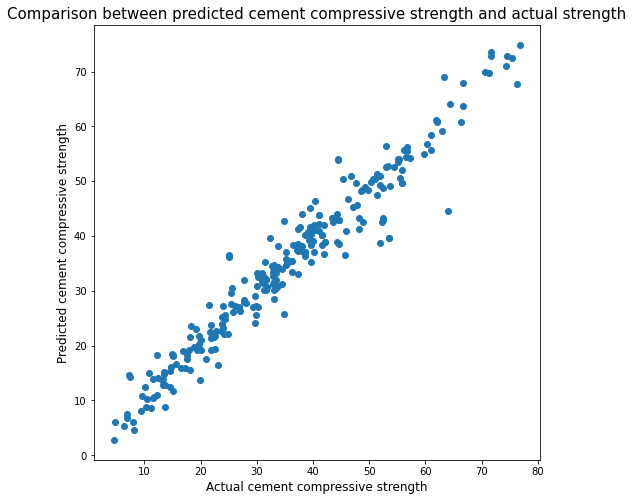

In [186]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(y_test,test_pred)
plt.title("Comparison between predicted cement compressive strength and actual strength",fontsize=15)
plt.xlabel("Actual cement compressive strength",fontsize=12)
plt.ylabel("Predicted cement compressive strength",fontsize=12)
plt.show()

### When feature selection is implemented, creating an extra variable "ratio" almost had no impact on test data R-squared. It is interesting to note that including the variable "Fly Ash" decreased rather than increased test data R-square. With feature selection and no outlier removal algorithm, 'Cement ', 'Blast Furnace Slag ', 'Fly Ash ', 'Water','Superplasticizer ', 'Coarse Aggregate ', 'Fine Aggregate ','Age (day)' explained about 94.5% of the variation in cement compressive strength.

### However, as shown above, "age" and the variable "ratio" obtained by dividing "water" by the sum of "cement" and "superplasticizer", water/(cement+superplasticizer), explained at least 82% of the variation in cement compressive strength. This tells us that the most import elements in cement compressive strength are "water", "cement", "plasticizer (or "superplasticizer") and "age(in days)".